<a href="https://colab.research.google.com/github/winyoo-trng/project-01/blob/main/_project_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, accuracy_score
from imblearn.over_sampling import SMOTE



import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
df = pd.read_excel('data(name).xlsx')
df.head()


,DATE,MONTH,forest_type,fire,Air_p,Temp,Mois,Rain,Sun_light,volatile,Wind_pow,Hot_spot
0,2014-01-01,1,1,0,1016.52,20.20,77.25,0.0,8.5,1.90,12.964,1
1,2014-01-01,1,2,0,1016.52,20.20,77.25,0.0,8.5,1.90,12.964,1
2,2014-01-01,1,3,0,1016.52,20.20,77.25,0.0,8.5,1.90,12.964,1
3,2014-01-02,1,1,0,1014.68,21.08,77.25,0.0,8.7,1.97,11.112,0
4,2014-01-02,1,2,0,1014.68,21.08,77.25,0.0,8.7,1.97,11.112,0


In [ ]:
descriptives_fire_0 = df[df["fire"] == 0].describe().T

# แสดงผลตารางให้สวยขึ้น
descriptives_fire_0.style.format(precision=2).set_caption("Descriptive Statistics for Fire = 0")

,count,mean,min,25%,50%,75%,max,std
DATE,15582,2019-06-02 12:57:12.268001536,2014-01-01 00:00:00,2016-09-23 06:00:00,2019-05-02 00:00:00,2022-03-09 00:00:00,2024-07-24 00:00:00,nan
MONTH,15582.00,5.57,1.00,3.00,4.00,8.00,12.00,3.28
forest_type,15582.00,2.15,1.00,2.00,2.00,3.00,3.00,0.79
fire,15582.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Air_p,15582.00,1009.32,101.17,1006.61,1009.03,1011.96,1313.63,14.05
Temp,15582.00,27.79,11.46,26.25,28.06,29.59,35.35,2.76
Mois,15582.00,64.05,26.69,53.00,65.13,74.13,95.50,12.72
Rain,15582.00,2.41,0.00,0.00,0.00,0.20,124.80,7.93
Sun_light,15582.00,7.83,0.00,6.30,9.20,10.10,12.40,3.13
volatile,15582.00,4.36,0.00,3.18,4.21,5.41,42.10,1.95


In [ ]:
descriptives_fire_0 = df[df["fire"] == 1].describe().T

# แสดงผลตารางให้สวยขึ้น
descriptives_fire_0.style.format(precision=2).set_caption("Descriptive Statistics for Fire = 1")

,count,mean,min,25%,50%,75%,max,std
DATE,3201,2019-09-14 19:53:55.613870592,2014-02-07 00:00:00,2017-03-10 00:00:00,2020-01-27 00:00:00,2022-04-18 00:00:00,2024-05-19 00:00:00,nan
MONTH,3201.00,3.22,1.00,3.00,3.00,4.00,5.00,0.76
forest_type,3201.00,1.28,1.00,1.00,1.00,1.00,3.00,0.52
fire,3201.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
Air_p,3201.00,1009.08,1001.13,1007.08,1008.95,1010.68,1108.20,4.40
Temp,3201.00,29.09,19.65,27.73,29.26,30.56,35.35,2.36
Mois,3201.00,51.74,35.63,47.38,51.38,55.63,80.88,6.34
Rain,3201.00,0.50,0.00,0.00,0.00,0.00,43.60,3.04
Sun_light,3201.00,9.62,0.00,9.20,9.90,10.40,12.40,1.26
volatile,3201.00,5.23,0.09,4.24,5.18,6.07,10.36,1.44


In [ ]:
descriptives = df.describe().T
descriptives

,count,mean,min,25%,50%,75%,max,std
DATE,18783,2019-06-20 07:30:19.837086464,2014-01-01 00:00:00,2016-10-08 00:00:00,2019-05-08 00:00:00,2022-03-20 00:00:00,2024-07-24 00:00:00,NaN
MONTH,18783.0,5.170739,1.0,3.0,4.0,7.0,12.0,3.133656
forest_type,18783.0,2.0,1.0,1.0,2.0,3.0,3.0,0.816518
fire,18783.0,0.17042,0.0,0.0,0.0,0.0,1.0,0.376011
Air_p,18783.0,1009.279648,101.168,1006.67,1009.0,1011.74,1313.63,12.921482
Temp,18783.0,28.008724,11.46,26.46,28.31,29.78,35.35,2.737346
Mois,18783.0,61.952728,26.69,51.13,60.63,72.5,95.5,12.744658
Rain,18783.0,2.083825,0.0,0.0,0.0,0.01,124.8,7.366385
Sun_light,18783.0,8.13692,0.0,7.1,9.4,10.1,12.4,2.974088
volatile,18783.0,4.506183,0.0,3.327778,4.48,5.58,42.1,1.903704


In [ ]:
# prompt: สร้างตารางแสดง % และจำนวน ของ MONTH ที่ fire = 1 ต่อfire ทั้งหมด

# Calculate the percentage and count of 'MONTH' where 'fire' = 1
fire_counts = df[df['fire'] == 1].groupby('MONTH')['fire'].count()
total_fire_counts = df.groupby('MONTH')['fire'].count()

# Reindex fire_counts to include all months, filling missing values with 0
fire_counts = fire_counts.reindex(total_fire_counts.index, fill_value=0)

percentage_fire = (fire_counts / total_fire_counts) * 100
# Create a DataFrame for the results
result_df = pd.DataFrame({
    'MONTH': fire_counts.index,
    'Count of fire = 1': fire_counts.values,
    'Percentage of fire = 1': percentage_fire.values
})
# Display the table
result_df

,MONTH,Count of fire = 1,Percentage of fire = 1
0,1,44,4.074074
1,2,372,23.308271
2,3,1773,33.072188
3,4,870,29.927761
4,5,142,11.296738
5,6,0,0.000000
6,7,0,0.000000
7,8,0,0.000000
8,9,0,0.000000
9,10,0,0.000000


In [ ]:
# prompt: สร้างตารางแสดง % และจำนวน ของ forest_typeที่ fire = 1 ต่อfire ทั้งหมด

# Calculate the percentage and count of 'forest_type' where 'fire' = 1
fire_counts = df[df['fire'] == 1].groupby('forest_type')['fire'].count()
total_fire_counts = df.groupby('forest_type')['fire'].count()

# Reindex fire_counts to include all forest types, filling missing values with 0
fire_counts = fire_counts.reindex(total_fire_counts.index, fill_value=0)

percentage_fire = (fire_counts / total_fire_counts) * 100

# Create a DataFrame for the results
result_df = pd.DataFrame({
    'forest_type': fire_counts.index,
    'Count of fire = 1': fire_counts.values,
    'Percentage of fire = 1': percentage_fire.values
})
# Display the table
result_df

,forest_type,Count of fire = 1,Percentage of fire = 1
0,1,2413,38.540169
1,2,682,10.892829
2,3,106,1.693020


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18783 entries, 0 to 18782
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         18783 non-null  datetime64[ns]
 1   MONTH        18783 non-null  int64         
 2   forest_type  18783 non-null  int64         
 3   fire         18783 non-null  int64         
 4   Air_p        18783 non-null  float64       
 5   Temp         18783 non-null  float64       
 6   Mois         18783 non-null  float64       
 7   Rain         18783 non-null  float64       
 8   Sun_light    18783 non-null  float64       
 9   volatile     18783 non-null  float64       
 10  Wind_pow     18783 non-null  float64       
 11  Hot_spot     18783 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 1.7 MB


In [ ]:
#สร้างตัวแปร x,y
x = df.drop(["fire","DATE","MONTH"], axis=1)
y = df["fire"]

#ตรวจสอบประเภทของตัวแปร x
x.dtypes

,0
forest_type,int64
Air_p,float64
Temp,float64
Mois,float64
Rain,float64
Sun_light,float64
volatile,float64
Wind_pow,float64
Hot_spot,int64


In [ ]:
#ใช้ one-hot encoding กับ คอลัมน์ MONTH', 'forest_type
x = pd.get_dummies(x, columns=['forest_type'], prefix=[ 'forest_type'])

#ตรวจสอบประเภทของตัวแปร x
x.dtypes


,0
Air_p,float64
Temp,float64
Mois,float64
Rain,float64
Sun_light,float64
volatile,float64
Wind_pow,float64
Hot_spot,int64
forest_type_1,bool
forest_type_2,bool


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, classification_report

# เก็บผลการทำนายของแต่ละโมเดล
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Neural Network (ANN)": MLPClassifier(random_state=42, max_iter=300),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

# เก็บผลการทำนายของแต่ละโมเดล
predictions = {}

for model_name, model in models.items():
    # ฝึกโมเดล
    model.fit(X_train, y_train)

    # ทำนายผลและบันทึกลงใน dictionary
    predictions[model_name] = model.predict(X_test)

# แสดงผลลัพธ์การประเมิน
for model_name, model in models.items():
    prediction = predictions[model_name]
    accuracy = accuracy_score(y_test, prediction)

    # คำนวณ AUC ROC score หากโมเดลนั้นรองรับ predict_proba หรือ decision_function
    try:
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]  # ใช้คอลัมน์ที่เป็นคลาส 1
        elif hasattr(model, "decision_function"):
            y_prob = model.decision_function(X_test)
        else:
            y_prob = None

        auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    except Exception as e:
        auc = f"Error calculating AUC: {e}"

    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} AUC ROC: {auc}")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, prediction)}\n")


Neural Network (ANN) Accuracy: 0.9285
Neural Network (ANN) AUC ROC: 0.9616305455219042
Neural Network (ANN) Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4720
           1       0.80      0.75      0.77       915

    accuracy                           0.93      5635
   macro avg       0.88      0.86      0.86      5635
weighted avg       0.93      0.93      0.93      5635


Decision Tree Accuracy: 0.9768
Decision Tree AUC ROC: 0.9649781189219228
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4720
           1       0.91      0.95      0.93       915

    accuracy                           0.98      5635
   macro avg       0.95      0.96      0.96      5635
weighted avg       0.98      0.98      0.98      5635


Random Forest Accuracy: 0.9849
Random Forest AUC ROC: 0.9946494396591645
Random Forest Classification R

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# แบ่งข้อมูลเป็น train และ test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# ทำการปรับข้อมูลให้เป็นมาตรฐาน
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# สร้าง dictionary สำหรับเก็บโมเดล
models = {
    "Neural Network (ANN)": MLPClassifier(random_state=42, max_iter=300),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

# เก็บผลการทำนายของแต่ละโมเดล
predictions = {}

# ฝึกโมเดลและบันทึกผลการทำนาย
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_test)

# แสดงผลลัพธ์การประเมิน
for model_name, model in models.items():
    prediction = predictions[model_name]
    accuracy = accuracy_score(y_test, prediction)

    # คำนวณ AUC ROC score หากโมเดลนั้นรองรับ predict_proba หรือ decision_function
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # ใช้ความน่าจะเป็นของคลาส 1
        auc = roc_auc_score(y_test, y_prob)
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)
        auc = roc_auc_score(y_test, y_prob)
    else:
        auc = "N/A"  # ถ้าโมเดลไม่รองรับ

    # คำนวณค่า TP, TN, FP, FN
    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()

    # คำนวณประสิทธิภาพต่าง ๆ
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} AUC ROC: {auc}")
    print(f"{model_name} TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")
    print(f"{model_name} Precision: {precision:.4f}")
    print(f"{model_name} Recall (Sensitivity): {recall:.4f}")
    print(f"{model_name} Specificity: {specificity:.4f}")
    print(f"{model_name} F1 Score: {f1_score:.4f}")
    print(f"{model_name} Classification Report:\n{classification_report(y_test, prediction)}\n")


Neural Network (ANN) Accuracy: 0.9285
Neural Network (ANN) AUC ROC: 0.9616305455219042
Neural Network (ANN) TP: 683, TN: 4549, FP: 171, FN: 232
Neural Network (ANN) Precision: 0.7998
Neural Network (ANN) Recall (Sensitivity): 0.7464
Neural Network (ANN) Specificity: 0.9638
Neural Network (ANN) F1 Score: 0.7722
Neural Network (ANN) Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      4720
           1       0.80      0.75      0.77       915

    accuracy                           0.93      5635
   macro avg       0.88      0.86      0.86      5635
weighted avg       0.93      0.93      0.93      5635


Decision Tree Accuracy: 0.9768
Decision Tree AUC ROC: 0.9649781189219228
Decision Tree TP: 867, TN: 4637, FP: 83, FN: 48
Decision Tree Precision: 0.9126
Decision Tree Recall (Sensitivity): 0.9475
Decision Tree Specificity: 0.9824
Decision Tree F1 Score: 0.9298
Decision Tree Classification Report:
              prec

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from imblearn.over_sampling import SMOTE

import warnings

# Ignore warnings
warnings.filterwarnings(action="ignore")

# แบ่งข้อมูลชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# ปรับสเกลข้อมูล
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# วิธีที่ 1: ทำ SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# กำหนดโมเดล
models = {
    "Neural Network (ANN)": MLPClassifier(random_state=42, max_iter=300),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

# Results storage
smote_results = {}
cv_results = {}

# ประเมินผลลัพธ์สำหรับแต่ละโมเดล (SMOTE เฉย ๆ)
for model_name, model in models.items():
    # ฝึกโมเดลด้วยข้อมูลที่ถูก resample ด้วย SMOTE
    model.fit(X_train_resampled, y_train_resampled)

    # ทำนายผล
    y_pred_smote = model.predict(X_test)

    # แสดงผลการทำนาย
    accuracy_smote = accuracy_score(y_test, y_pred_smote)
    report_smote = classification_report(y_test, y_pred_smote, output_dict=True)
    precision_smote = report_smote['1']['precision']
    recall_smote = report_smote['1']['recall']
    f1_score_smote = report_smote['1']['f1-score']

    smote_results[model_name] = {
        "Accuracy": accuracy_smote,
        "Precision": precision_smote,
        "Recall": recall_smote,
        "F1-Score": f1_score_smote,
    }

# วิธีที่ 2: ทำ CV + SMOTE
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    # รายการเก็บค่าประสิทธิภาพ
    cv_accuracies = []
    cv_precisions = []
    cv_recalls = []
    cv_f1_scores = []

    for train_index, val_index in kf.split(X_train):
        X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

        # ทำ SMOTE สำหรับแต่ละ fold
        X_train_resampled_cv, y_train_resampled_cv = smote.fit_resample(X_train_cv, y_train_cv)

        # ฝึกโมเดล
        model.fit(X_train_resampled_cv, y_train_resampled_cv)

        # ทำนายผล
        y_val_pred = model.predict(X_val_cv)

        # เก็บค่าประสิทธิภาพ
        cv_accuracies.append(accuracy_score(y_val_cv, y_val_pred))
        report = classification_report(y_val_cv, y_val_pred, output_dict=True)
        cv_precisions.append(report['1']['precision'])  # Precision ของ class 1
        cv_recalls.append(report['1']['recall'])        # Recall ของ class 1
        cv_f1_scores.append(report['1']['f1-score'])   # F1-Score ของ class 1

    # คำนวณค่าเฉลี่ยของค่าที่เก็บได้
    average_cv_accuracy = np.mean(cv_accuracies)
    average_cv_precision = np.mean(cv_precisions)
    average_cv_recall = np.mean(cv_recalls)
    average_cv_f1_score = np.mean(cv_f1_scores)

    cv_results[model_name] = {
        "Average CV Accuracy": average_cv_accuracy,
        "Average CV Precision": average_cv_precision,
        "Average CV Recall": average_cv_recall,
        "Average CV F1-Score": average_cv_f1_score,
    }

# สร้าง DataFrame สำหรับแสดงผลลัพธ์
smote_df = pd.DataFrame(smote_results).T
cv_df = pd.DataFrame(cv_results).T

# เปรียบเทียบผลลัพธ์ในรูปแบบตาราง
comparison_df = pd.concat([smote_df.add_prefix('SMOTE_'), cv_df.add_prefix('CV_')], axis=1)

# สร้างตารางสวยงาม
styled_table = comparison_df.style.set_table_attributes('class="table table-striped"') \
                                  .set_caption("Comparison of SMOTE only vs. CV + SMOTE") \
                                  .highlight_max(axis=0, color='lightgreen') \
                                  .highlight_min(axis=0, color='lightcoral')

# แสดงผลตาราง
styled_table


,SMOTE_Accuracy,SMOTE_Precision,SMOTE_Recall,SMOTE_F1-Score,CV_Average CV Accuracy,CV_Average CV Precision,CV_Average CV Recall,CV_Average CV F1-Score
Neural Network (ANN),0.905413,0.645137,0.927869,0.761094,0.902799,0.659608,0.913174,0.765741
Decision Tree,0.967524,0.869697,0.940984,0.903937,0.965090,0.870805,0.938795,0.903496
Random Forest,0.981012,0.934409,0.949727,0.942005,0.974673,0.922485,0.933275,0.927829
Extra Trees,0.981366,0.940217,0.945355,0.942779,0.975129,0.922063,0.936485,0.929147
XGBoost,0.966460,0.878125,0.921311,0.899200,0.954822,0.849656,0.899925,0.874008


In [ ]:
for model_name, metrics in smote_results.items():
    print(f"Model: {model_name}")  # Print the model name
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")  # Print Accuracy
    print(f"  Precision: {metrics['Precision']:.4f}")  # Print Precision
    print(f"  Recall: {metrics['Recall']:.4f}")  # Print Recall
    print(f"  F1-score: {metrics['F1-Score']:.4f}")  # Print F1-score
    print("-" * 30)  # Print separator line

Model: Decision Tree
  Accuracy: 0.9675
  Precision: 0.8697
  Recall: 0.9410
  F1-score: 0.9039
------------------------------
Model: Random Forest
  Accuracy: 0.9810
  Precision: 0.9344
  Recall: 0.9497
  F1-score: 0.9420
------------------------------
Model: Neural Network (ANN)
  Accuracy: 0.9054
  Precision: 0.6451
  Recall: 0.9279
  F1-score: 0.7611
------------------------------
Model: XGBoost
  Accuracy: 0.9665
  Precision: 0.8781
  Recall: 0.9213
  F1-score: 0.8992
------------------------------
Model: Extra Trees
  Accuracy: 0.9814
  Precision: 0.9402
  Recall: 0.9454
  F1-score: 0.9428
------------------------------


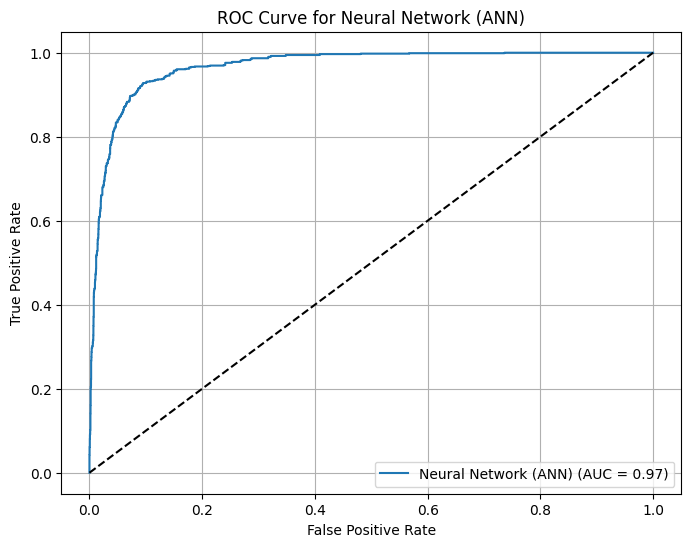

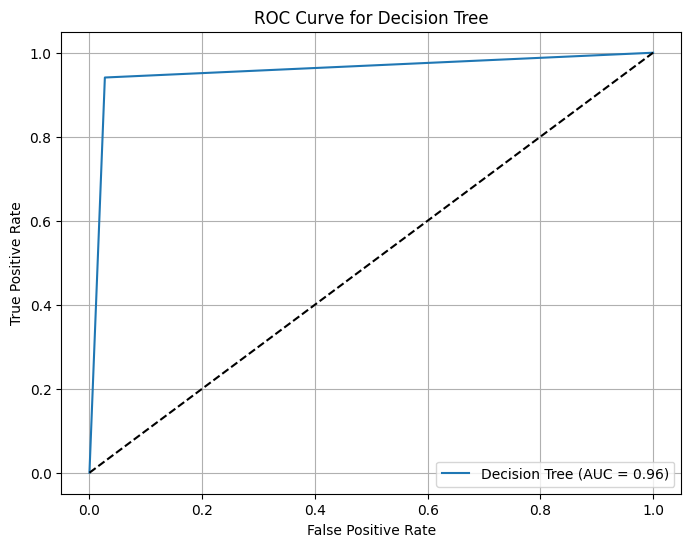

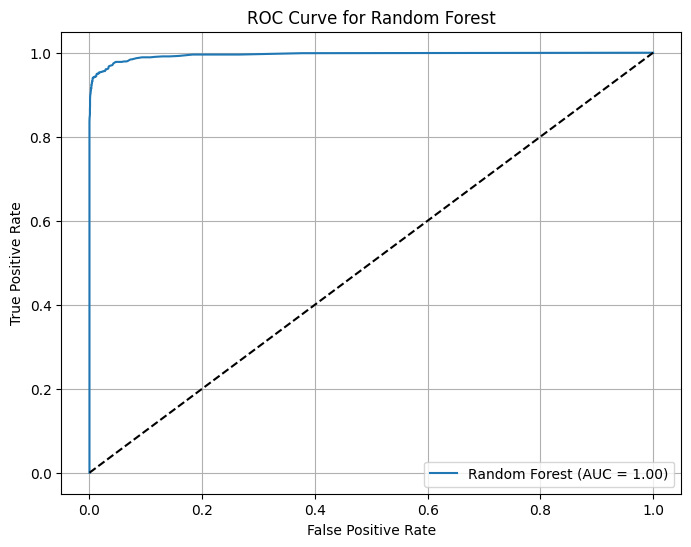

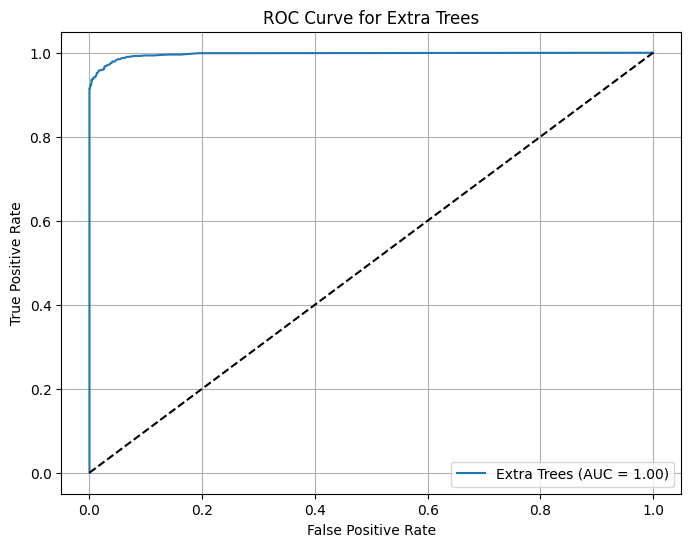

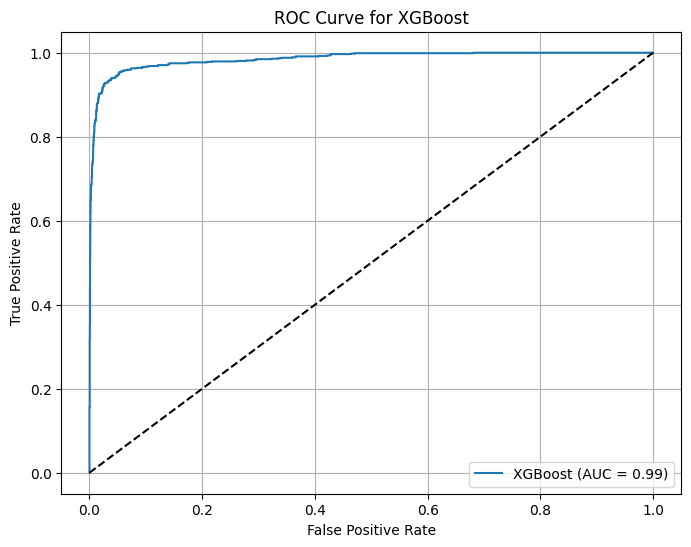

In [ ]:



models = {
    "Neural Network (ANN)": MLPClassifier(random_state=42, max_iter=300),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}


# Step 2: Train each model and plot ROC curves separately
for name, model in models.items():
    # Train the model using the resampled data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities for the positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)  # Compute the AUC score

    # Plot the ROC curve for the current model
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


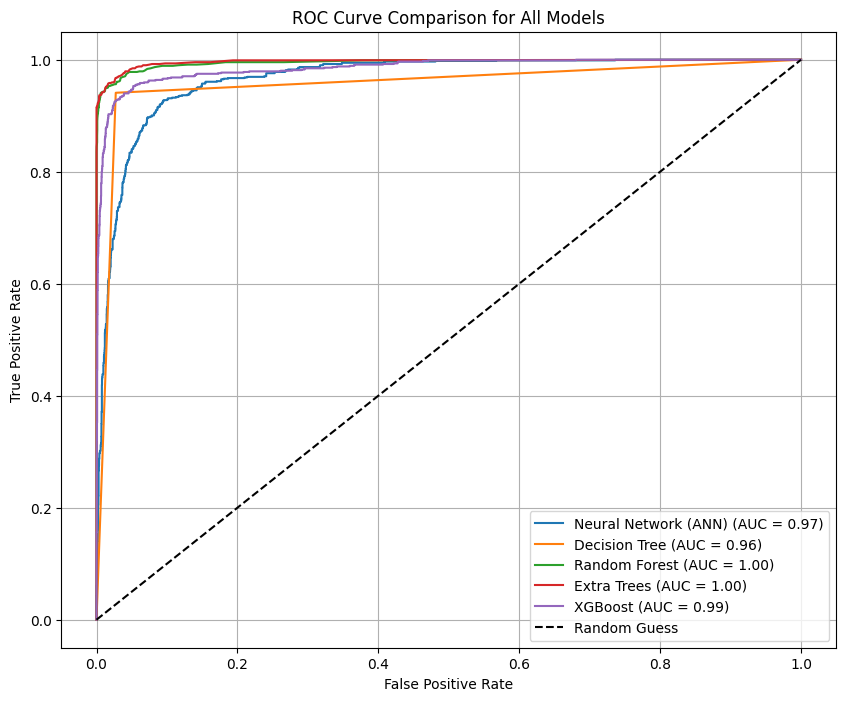

In [ ]:
# เตรียมโมเดลที่ต้องการใช้
models = {
    "Neural Network (ANN)": MLPClassifier(random_state=42, max_iter=300),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

# สร้างกราฟ ROC สำหรับแต่ละโมเดลในกราฟเดียว
plt.figure(figsize=(10, 8))  # ขนาดกราฟใหญ่ขึ้นเพื่อให้ข้อมูลชัดเจน

for name, model in models.items():
    # ฝึกโมเดลโดยใช้ข้อมูลที่ถูก resample ด้วย SMOTE
    model.fit(X_train_resampled, y_train_resampled)

    # คำนวณความน่าจะเป็นของคลาสบวก
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # คำนวณค่าความแม่นยำของ ROC และพื้นที่ใต้โค้ง (AUC)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # วาดกราฟ ROC สำหรับแต่ละโมเดล
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# วาดเส้น diagonal line (สุ่มทำนาย) สำหรับการอ้างอิง
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# ตั้งค่ากราฟ
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


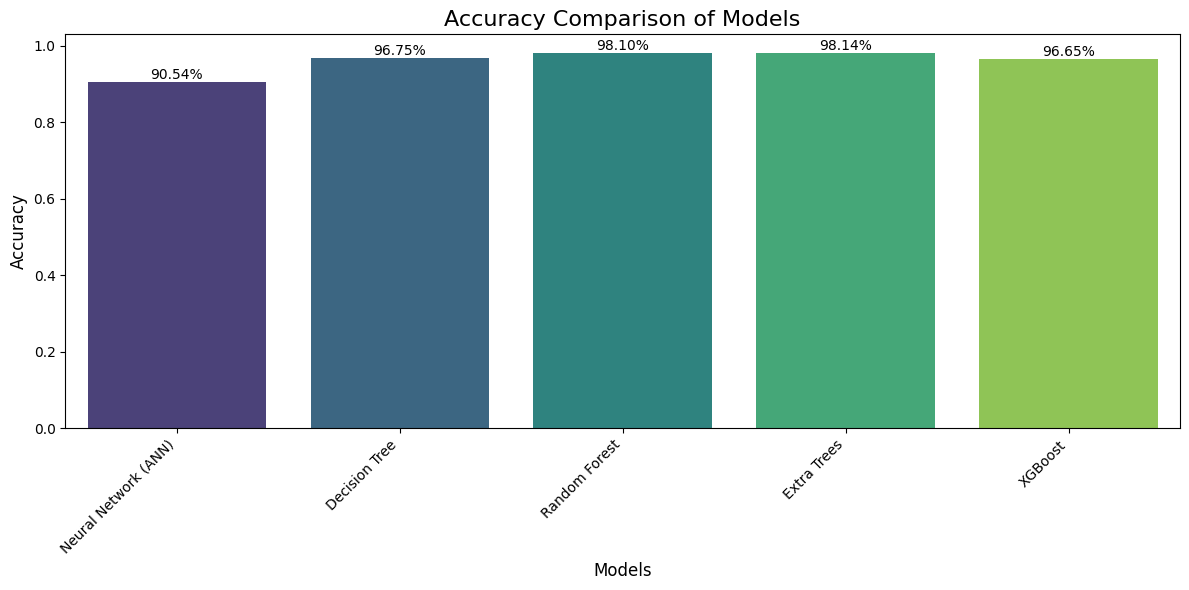

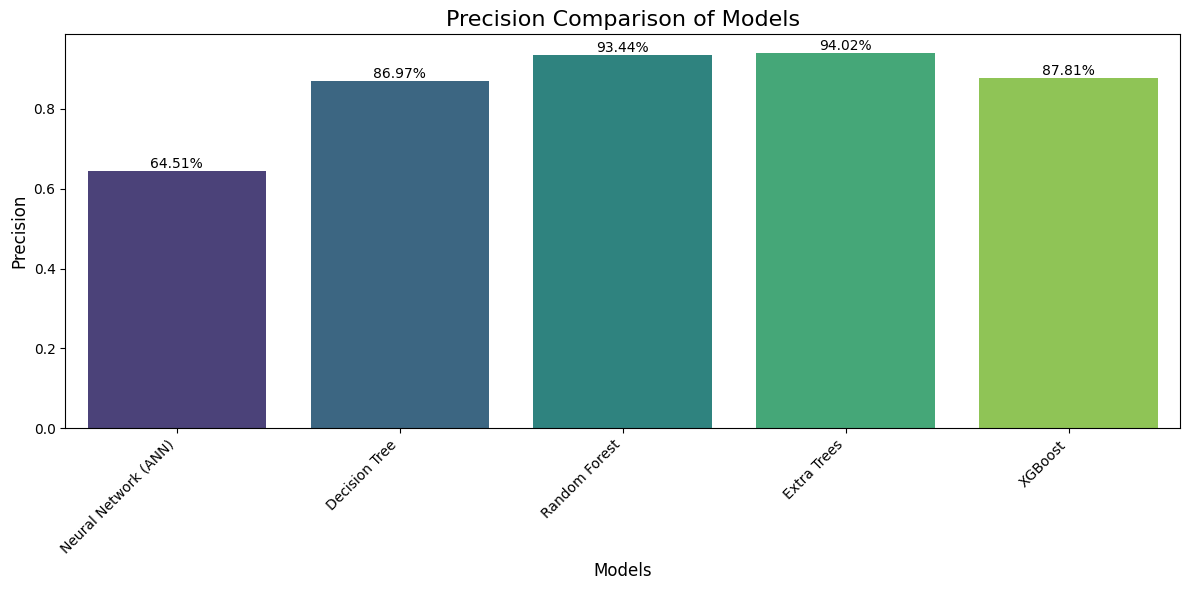

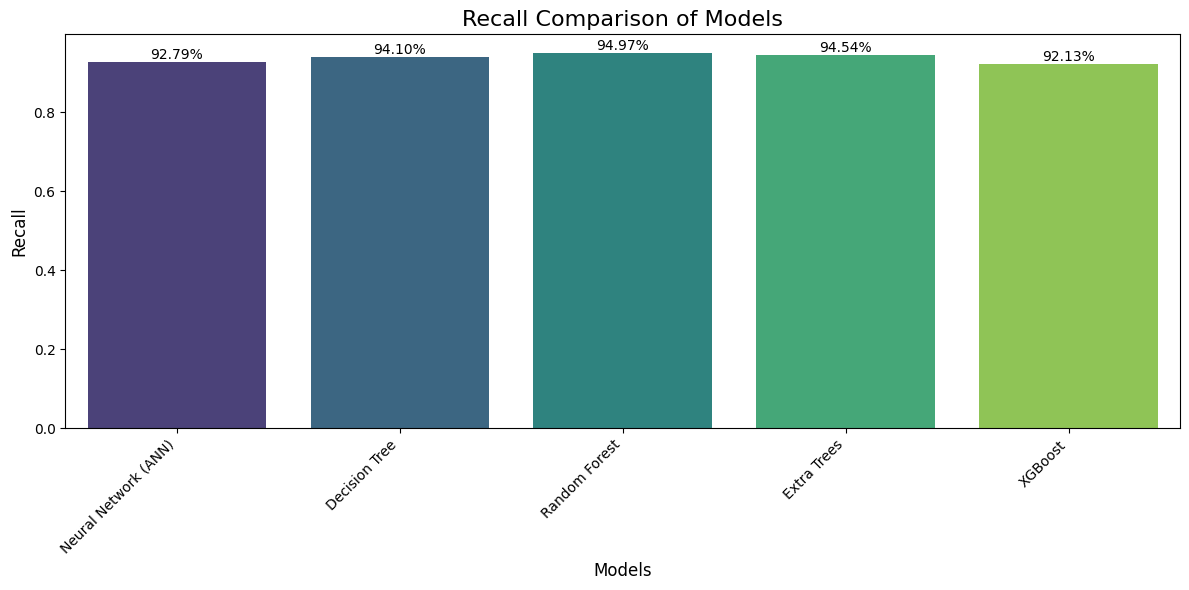

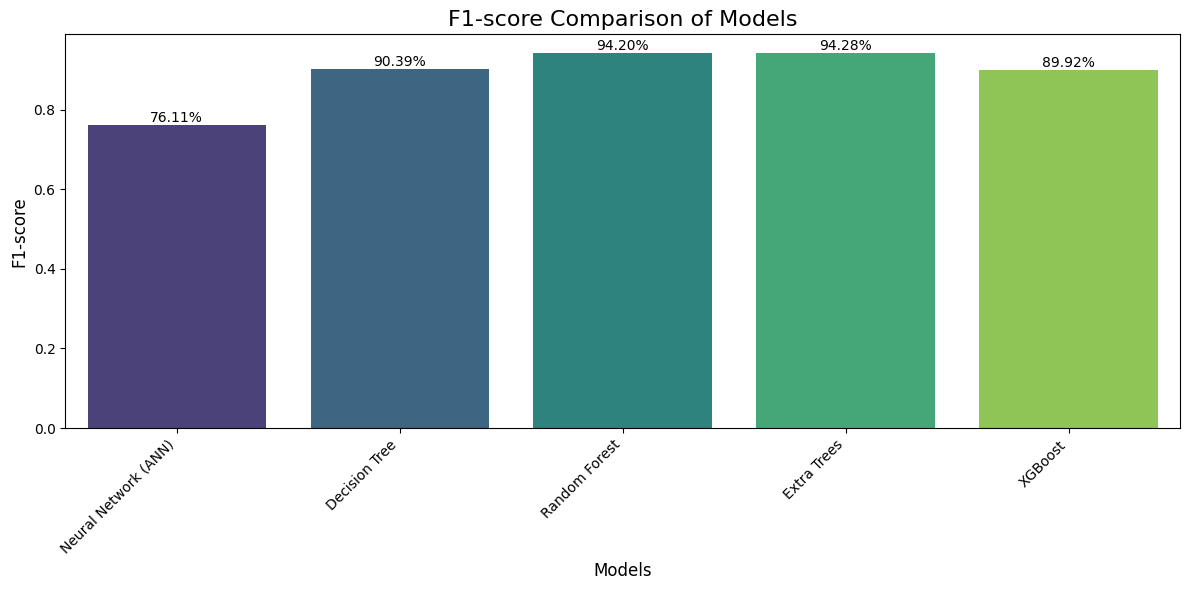

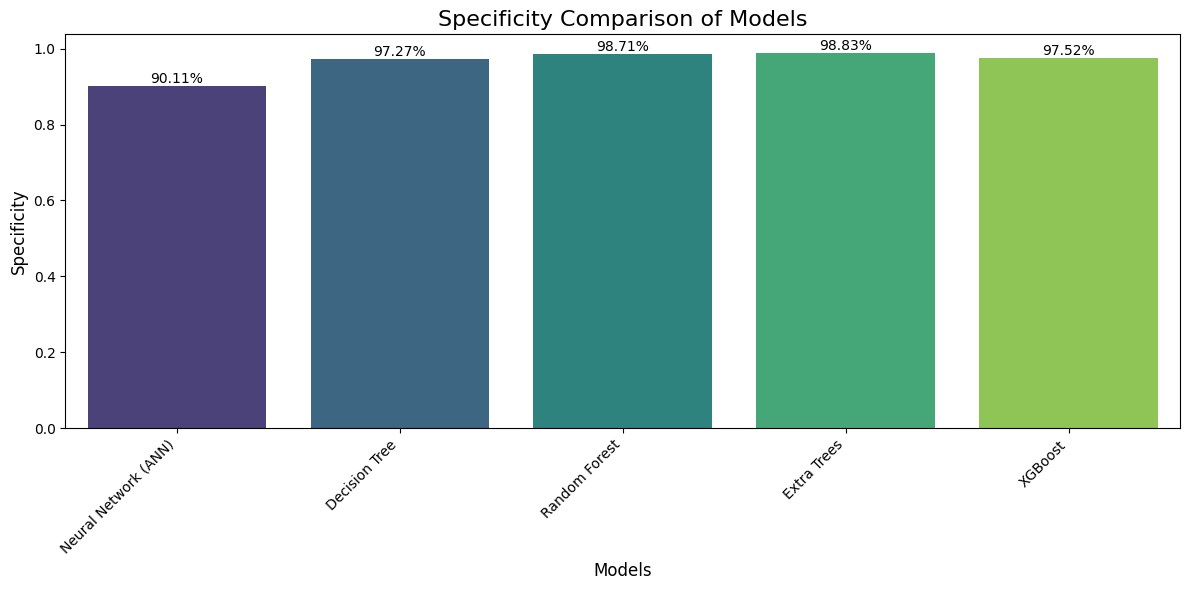

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models to be evaluated
models = {
    "Neural Network (ANN)": MLPClassifier(random_state=42, max_iter=300),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

# Prepare to collect the report data
report_data = {}

# Step 1: Evaluate models with SMOTE
for name, model in models.items():
    # Train the model and predict
    y_pred = model.fit(X_train_resampled, y_train_resampled).predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Calculate Specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)

    # Add the calculated metrics
    report_data[name] = {
        'accuracy': np.round(report['accuracy'], 4),
        'precision': np.round(report['1']['precision'], 4),
        'recall': np.round(report['1']['recall'], 4),
        'f1-score': np.round(report['1']['f1-score'], 4),
        'specificity': np.round(specificity, 4)
    }

# Define the metrics to visualize
metrics = ['accuracy', 'precision', 'recall', 'f1-score', 'specificity']
for metric in metrics:
    plt.figure(figsize=(12, 6))

    # Use Seaborn for a more stylish bar plot
    sns.barplot(x=list(report_data.keys()), y=[report_data[model][metric] for model in report_data], palette="viridis")

    plt.title(f'{metric.capitalize()} Comparison of Models', fontsize=16)
    plt.xlabel('Models', fontsize=12)
    plt.ylabel(metric.capitalize(), fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Add value labels to the bars
    for p in plt.gca().patches:
        plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height()*100:.2f}%',
                       ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

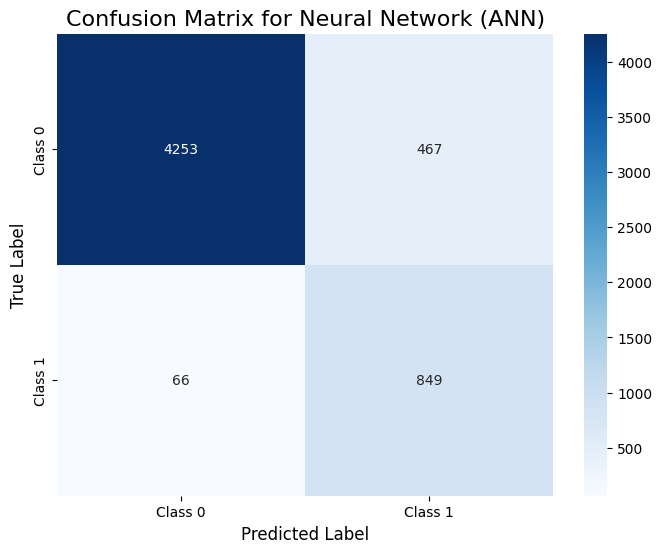

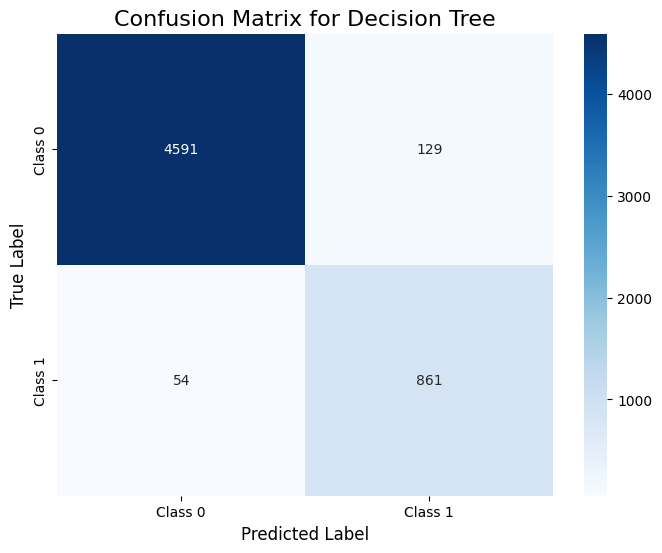

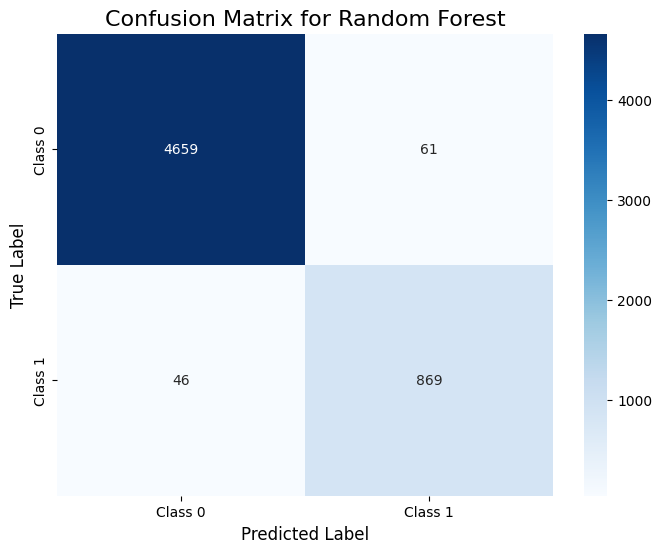

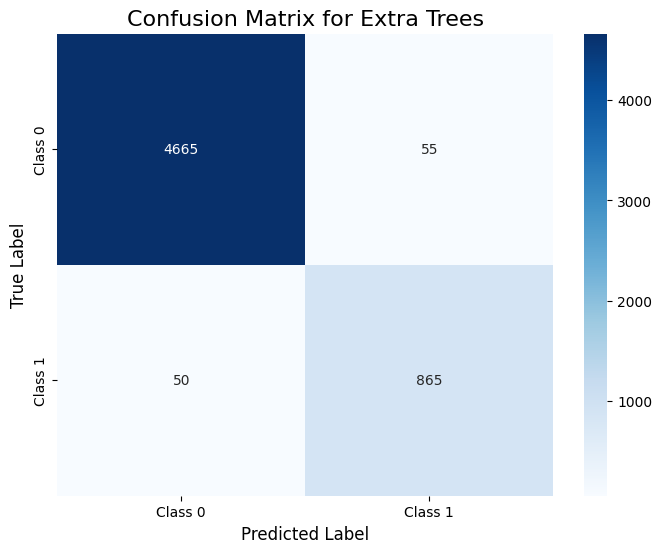

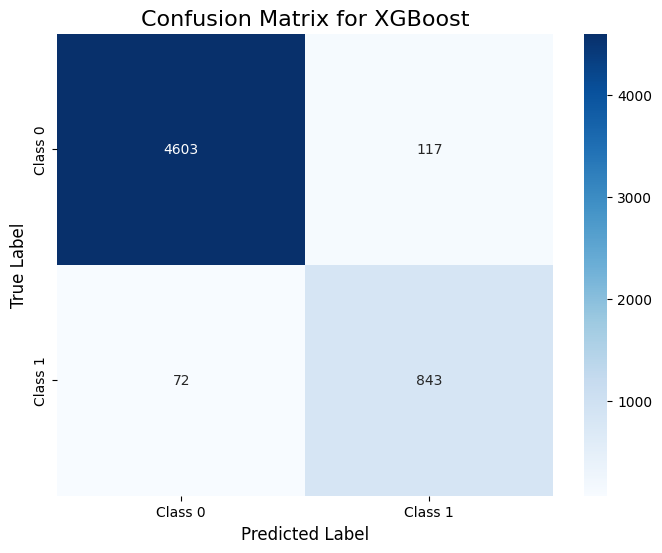

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

for name, model in models.items():
    # Train the model and predict
    y_pred = model.fit(X_train_resampled, y_train_resampled).predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f'Confusion Matrix for {name}', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.show()



In [ ]:
# prompt: คำนวนค่า Specsitivity ของทั้ง 5 โมเดล
from sklearn.metrics import confusion_matrix
# Assuming 'y_test' and 'y_pred' are already defined for each model
for model_name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate the confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate Specificity
    specificity = tn / (tn + fp)

    print(f"Specificity for {model_name}: {specificity}")

Specificity for Neural Network (ANN): 0.9010593220338983
Specificity for Decision Tree: 0.9726694915254237
Specificity for Random Forest: 0.9870762711864407
Specificity for Extra Trees: 0.9883474576271186
Specificity for XGBoost: 0.9752118644067796
